In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/MyDrive/colab_notebooks/zupee_game_recom/')


In [3]:
import numpy as np
import pandas as pd
import os
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#Setting global paths
# data_dir = '/drive/MyDrive/colab_notebooks/zupee_game_recom/'
data_dir = ''

gameplay_path = 'Gameplay_Data.csv'
demographic_path = 'Demographic.csv'
wallet_path = 'Wallet_Balance.csv'

In [4]:
#Reading the data
game_data = pd.read_csv(data_dir+gameplay_path)
demographic = pd.read_csv(data_dir+demographic_path)
wallet = pd.read_csv(data_dir+wallet_path).rename(columns={' Timestamp':'timestamp', ' Wallet_Balance': 'balance'})  #Cleaning column names for better referencing
wallet = wallet.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [5]:
#preprocessing timestamp fields

wallet['timestamp'] = wallet['timestamp'].apply(lambda x:datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S.%f"))
game_data['Eventtime'] = game_data['Eventtime'].apply(lambda x:datetime.datetime.fromtimestamp(int(x)/1000).strftime("%Y-%m-%d %H:%M:%S"))
demographic['Installed_At'] = demographic['Installed_At'].apply(lambda x:datetime.datetime.fromtimestamp(int(x)/1000).strftime("%Y-%m-%d %H:%M:%S"))

# Dropping duplicate values
demographic.drop_duplicates(subset='Uid', keep='first', inplace=True)
wallet.drop_duplicates(inplace=True)
game_data.drop_duplicates(inplace=True)

print(f"SIZE:\nDemographic: {len(demographic)}\nWallet: {len(wallet)}\nGame_Data: {len(game_data)}")

SIZE:
Demographic: 21437
Wallet: 545835
Game_Data: 306632


In [6]:
game_data.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players
0,90976392B3AA5DB94D134936B765879E,2020-12-06 22:40:30,0.0,W,10.0,D,4
1,7457E894E1F7F1938E55802B964BDD27,2020-12-06 20:31:47,1000.0,W,1700.0,A,2
2,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 19:21:02,3500.0,L,0.0,A,2
3,5736C06C66C6BC7036CCE9804F54A57C,2020-12-12 13:14:35,1000.0,W,3200.0,B,4
4,5FE2DDA792CA72F731D818A5ECC5F1EB,2020-12-12 13:09:34,2500.0,W,4200.0,A,2


In [7]:
wallet.head()

,Uid,timestamp,balance
0,929A32AC6F614F29BEEA8601BDF0676C,2020-11-12 06:28:44,10.0
1,929A32AC6F614F29BEEA8601BDF0676C,2020-11-12 06:32:19,20.0
2,929A32AC6F614F29BEEA8601BDF0676C,2020-11-12 06:32:38,10.0
3,929A32AC6F614F29BEEA8601BDF0676C,2020-11-12 06:34:05,20.0
4,929A32AC6F614F29BEEA8601BDF0676C,2020-11-12 06:34:37,15.0


In [8]:
game_data.nunique()

Uid                 10499
Eventtime          260124
Entry_Fee              14
Win_Loss                2
Winnings               64
Tournament_Type         4
Num_Players             2
dtype: int64

In [9]:
wallet.nunique()

Uid           21757
timestamp    462179
balance        3225
dtype: int64

In [10]:
# wallet_game = list(set(wallet['Uid'].unique()).intersection(set(game_data['Uid'].unique())))
# active_wallet = wallet[wallet['Uid'].isin(list(wallet_game))]
# active_wallet.nunique()

In [11]:
demo_columns = ['Uid', 'Installed_At', 'Network_Type', 'Country', 'Country_Subdivision', 'City',
       'Postal_Code', 'Language', 'Device_Type']
demographic = demographic[demo_columns]
demographic = demographic[~demographic['Postal_Code'].isna()][~demographic['City'].isna()]

<ipython-input-11-d0615750a15f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demographic = demographic[~demographic['Postal_Code'].isna()][~demographic['City'].isna()]


In [12]:
# w_g = set(wallet['Uid'].unique())-set(game_data['Uid'].unique())
# g_w = set(game_data['Uid'].unique()) - set(wallet['Uid'].unique())
# g_d = set(game_data['Uid'].unique()) - set(demographic['Uid'].unique())
# d_g = set(demographic['Uid'].unique()) - set(game_data['Uid'].unique())
# w_d = set(wallet['Uid'].unique()) - set(demographic['Uid'].unique())
# len(g_w), len(w_g), len(g_d), len(d_g), len(w_d)


# Choosing Intersection of all dataframes
wallet_game = set(wallet['Uid'].unique()).intersection(set(game_data['Uid'].unique()))
wallet_game_demo = wallet_game.intersection(set(demographic['Uid'].unique()))
len(wallet_game_demo)

10086

In [13]:
# Filtering only for players who has game_data, demo, wallet
demographic = demographic[demographic['Uid'].isin(list(wallet_game_demo))]
wallet = wallet[wallet['Uid'].isin(list(wallet_game_demo))]
game_data = game_data[game_data['Uid'].isin(list(wallet_game_demo))]


In [14]:
demographic.nunique(),wallet.nunique(),game_data.nunique()

(Uid                    10086
 Installed_At            2349
 Network_Type              11
 Country                    7
 Country_Subdivision       40
 City                     314
 Postal_Code              738
 Language                   6
 Device_Type                3
 dtype: int64, Uid           10086
 timestamp    429456
 balance        3148
 dtype: int64, Uid                 10086
 Eventtime          249214
 Entry_Fee              14
 Win_Loss                2
 Winnings               64
 Tournament_Type         4
 Num_Players             2
 dtype: int64)

In [15]:
demographic.head()

,Uid,Installed_At,Network_Type,Country,Country_Subdivision,City,Postal_Code,Language,Device_Type
1,2762F8FB0C406E59DC9D665A4CCEE468,1970-01-19 14:54:29,0,in,Bihar,Patna,800001,en,phone
5,CCACBDB3B6A49FC83032FB827D57DB23,1970-01-19 14:54:29,0,in,Bihar,Muzaffarpur,843113,en,phone
7,97E7056130DDED684B9FD9441B1B8DE1,1970-01-19 14:54:30,13,in,National Capital Territory of Delhi,New Delhi,110008,en,phone
8,D50665FB8B20447E0EDD15871BB8760B,1970-01-19 14:54:30,13,in,Rajasthan,Jaipur,302012,hi,phone
10,088602CBA7EC210864FD55CF4EF81F6A,1970-01-19 14:54:30,0,in,Odisha,Bhubaneswar,752116,en,phone


In [16]:
demographic.isna().sum()

Uid                    0
Installed_At           0
Network_Type           0
Country                0
Country_Subdivision    2
City                   0
Postal_Code            0
Language               0
Device_Type            0
dtype: int64

In [17]:
demographic.shape

(10086, 9)

In [18]:
# from sklearn.feature_extraction import DictVectorizer, CountVectorizer
# vec = DictVectorizer(sparse=True)
# vec.fit_transform(demographic)

In [19]:
hot_cols = ['Country', 'Language', 'Device_Type']
demographic_new = pd.get_dummies(demographic,
                     columns = hot_cols)
demographic_new

,Uid,Installed_At,Network_Type,Country_Subdivision,City,Postal_Code,Country_ch,Country_de,Country_gb,Country_ie,...,Country_us,Language_bn,Language_en,Language_gu,Language_hi,Language_mr,Language_ms,Device_Type_phone,Device_Type_tablet,Device_Type_tv
1,2762F8FB0C406E59DC9D665A4CCEE468,1970-01-19 14:54:29,0,Bihar,Patna,800001,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,CCACBDB3B6A49FC83032FB827D57DB23,1970-01-19 14:54:29,0,Bihar,Muzaffarpur,843113,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,97E7056130DDED684B9FD9441B1B8DE1,1970-01-19 14:54:30,13,National Capital Territory of Delhi,New Delhi,110008,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,D50665FB8B20447E0EDD15871BB8760B,1970-01-19 14:54:30,13,Rajasthan,Jaipur,302012,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
10,088602CBA7EC210864FD55CF4EF81F6A,1970-01-19 14:54:30,0,Odisha,Bhubaneswar,752116,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,835C4E8E24987FFF431AEB4934436817,1970-01-19 15:00:22,0,Rajasthan,Jaipur,302012,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21487,1F1BF6719337F7BCE0A1465C2EBE0675,1970-01-19 15:00:22,13,Rajasthan,Jaipur,302001,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21490,AB0AA8743679A28720A9E2AADF7CD456,1970-01-19 15:00:23,13,Rajasthan,Jaipur,302012,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21491,E88FD0E63D22FA518C2B817A9E433374,1970-01-19 15:00:23,0,Karnataka,Bengaluru,560002,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [20]:
# Import label encoder
from sklearn import preprocessing
  
# encoder object knows how to understand word labels.
# encoder = preprocessing.LabelEncoder()
encoder = preprocessing.OrdinalEncoder()
  
# Encode labels in column Country Subdivision and Postal Code.
demographic_new['Country_Subdivision']= encoder.fit_transform(demographic_new['Country_Subdivision'].values.reshape(-1,1))  
demographic_new['Postal_Code']= encoder.fit_transform(demographic_new['Postal_Code'].values.reshape(-1,1))  

#Since we have already used Country, Subdivision and Postal Code no need to keep City
demographic_new.drop(columns=['City'], inplace=True)

In [21]:
demographic_new.head()

,Uid,Installed_At,Network_Type,Country_Subdivision,Postal_Code,Country_ch,Country_de,Country_gb,Country_ie,Country_in,...,Country_us,Language_bn,Language_en,Language_gu,Language_hi,Language_mr,Language_ms,Device_Type_phone,Device_Type_tablet,Device_Type_tv
1,2762F8FB0C406E59DC9D665A4CCEE468,1970-01-19 14:54:29,0,4.0,665.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5,CCACBDB3B6A49FC83032FB827D57DB23,1970-01-19 14:54:29,0,4.0,709.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
7,97E7056130DDED684B9FD9441B1B8DE1,1970-01-19 14:54:30,13,25.0,10.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8,D50665FB8B20447E0EDD15871BB8760B,1970-01-19 14:54:30,13,30.0,191.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
10,088602CBA7EC210864FD55CF4EF81F6A,1970-01-19 14:54:30,0,28.0,638.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### Preprocessing WALLET_Data

In [22]:
# variance of wallet balance
wallet_new = wallet.groupby('Uid')['balance'].agg(["mean", "median", "var", 'min', 'max']).reset_index()
wallet_new['var'].fillna(wallet_new['var'].median(), inplace=True)
wallet_new.head()

,Uid,mean,median,var,min,max
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,19.186441,18.0,48.326710,5.0,35.0
1,0016F36E9D87DC1C1D8FCA7F84648122,22.745098,22.0,37.320520,3.0,43.0
2,001FF74012A29BF8670F9900678EC6AA,10.000000,10.0,74.652681,10.0,10.0
3,0022A74B9628710371ACABEA720599E8,10.000000,10.0,74.652681,10.0,10.0
4,0025E1205C4BC9306E1E7ECB3442CBFA,20.428571,13.0,192.952381,10.0,47.0


### Preprocessing GAME_Data

In [23]:
# capturing metrics at player level from Game Data
user_entryfee_df = game_data.groupby('Uid')['Entry_Fee'].agg(["mean", "var", 'min', 'max',pd.Series.mode]).reset_index()
user_entryfee_df['var'].fillna(user_entryfee_df['var'].median(), inplace=True)
user_entryfee_df.head()

,Uid,mean,var,min,max,mode
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,122.448980,53443.877551,0.0,1000.0,100.0
1,0016F36E9D87DC1C1D8FCA7F84648122,209.230769,81475.961538,100.0,1000.0,100.0
2,001FF74012A29BF8670F9900678EC6AA,0.000000,0.000000,0.0,0.0,0.0
3,0022A74B9628710371ACABEA720599E8,0.000000,48611.111111,0.0,0.0,0.0
4,0025E1205C4BC9306E1E7ECB3442CBFA,3500.000000,48611.111111,3500.0,3500.0,3500.0


In [24]:
print("DISTRIBUTION OF USERS ACROSS MOST USED ENTRY FEES:\n",user_entryfee_df['mode'].value_counts())
print(user_entryfee_df['min'].min(),user_entryfee_df['min'].max())

DISTRIBUTION OF USERS ACROSS MOST USED ENTRY FEES:
 0.0                 4134
100.0               2806
1000.0              1290
3500.0               573
500.0                455
                    ... 
[500.0, 1000.0]        1
[100.0, 1000.0]        1
[100.0, 1000.0]        1
[100.0, 1000.0]        1
[1000.0, 3500.0]       1
Name: mode, Length: 480, dtype: int64
0.0 10000.0


HENCE WE SEE THAT MOST USERS HAVE GONE FOR FREE, 100, 1000 AND 3500 ENTRY FEES

In [25]:
# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(np.array(user_entryfee_df['mode']).all(), n_bins = 200)
 
# # Show plot
# plt.show()

In [26]:
# Since there are no categorical columns we don't need One Hot Encodeing we require to binarise some feautures
binary_cols = ['Win_Loss', 'Num_Players']
encoder = preprocessing.LabelEncoder()
  
# Encode labels in column Country Subdivision and Postal Code.
for bin_col in binary_cols:
    game_data[bin_col] = encoder.fit_transform(game_data[bin_col])

game_data.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players
0,90976392B3AA5DB94D134936B765879E,2020-12-06 22:40:30,0.0,1,10.0,D,1
1,7457E894E1F7F1938E55802B964BDD27,2020-12-06 20:31:47,1000.0,1,1700.0,A,0
2,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 19:21:02,3500.0,0,0.0,A,0
3,5736C06C66C6BC7036CCE9804F54A57C,2020-12-12 13:14:35,1000.0,1,3200.0,B,1
4,5FE2DDA792CA72F731D818A5ECC5F1EB,2020-12-12 13:09:34,2500.0,1,4200.0,A,0


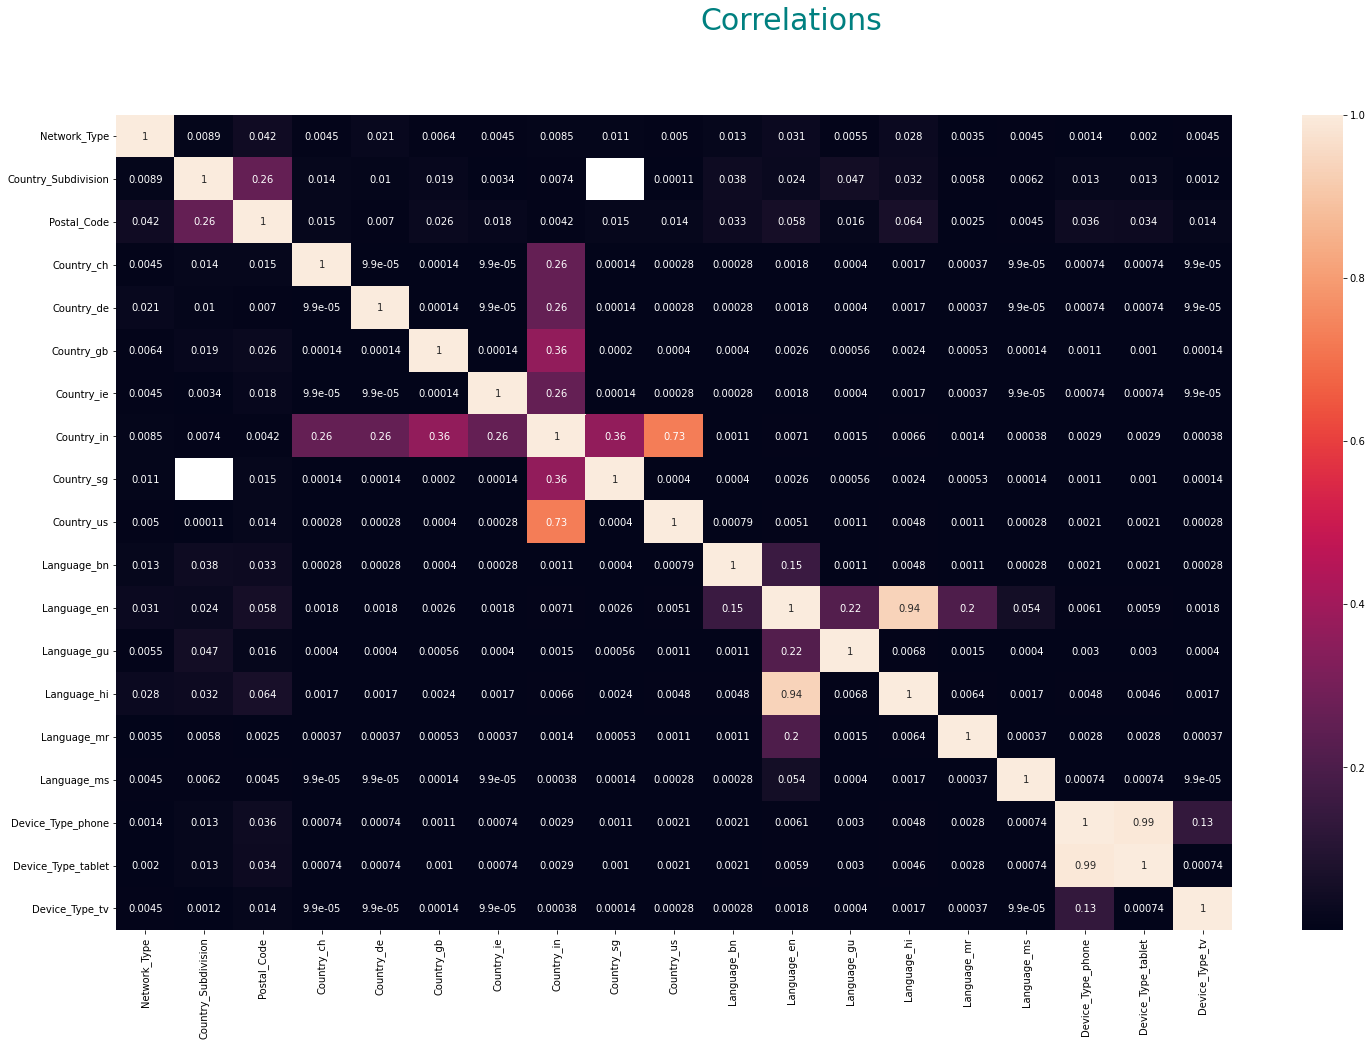

In [27]:
#Plotting out a correlation between different aspects of Demographics
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = demographic_new.corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

In [28]:
# Based on the high intercorrelation we are dropping some of the features from demographic_new since they are correlated with other features
corr = demographic_new.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)


['Language_hi', 'Device_Type_tablet']


In [29]:
# Based on the low intercorrelation we are not dropping any features from the wallet or game_data
corr = wallet_new.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)
# Dropping respective features
# demographic_new.drop(columns=to_drop, inplace=True)
corr = game_data.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)


['median', 'max']
[]


As we can see that median and max doesn't make much sense in the game_data and hence we have dropped it.

## Joining all data into one Training Sample

In [30]:
# To get User Personas and User Matrix : Merged demographic, wallet and gamer data at UID level
cleaned_data_user = pd.merge(pd.merge(demographic_new,wallet_new,on='Uid'),user_entryfee_df,on='Uid')
cleaned_data_user.head()

,Uid,Installed_At,Network_Type,Country_Subdivision,Postal_Code,Country_ch,Country_de,Country_gb,Country_ie,Country_in,...,mean_x,median,var_x,min_x,max_x,mean_y,var_y,min_y,max_y,mode
0,2762F8FB0C406E59DC9D665A4CCEE468,1970-01-19 14:54:29,0,4.0,665.0,0,0,0,0,1,...,6.753846,4.5,104.450566,-7.0,33.0,478.846154,142484.917044,100.0,1500.0,500.0
1,CCACBDB3B6A49FC83032FB827D57DB23,1970-01-19 14:54:29,0,4.0,709.0,0,0,0,0,1,...,21.589189,24.0,82.917274,3.0,46.0,268.539326,128089.887640,0.0,1000.0,100.0
2,97E7056130DDED684B9FD9441B1B8DE1,1970-01-19 14:54:30,13,25.0,10.0,0,0,0,0,1,...,12.000000,11.0,5.200000,10.0,16.0,166.666667,26666.666667,100.0,500.0,100.0
3,D50665FB8B20447E0EDD15871BB8760B,1970-01-19 14:54:30,13,30.0,191.0,0,0,0,0,1,...,11.000000,11.0,1.000000,10.0,12.0,100.000000,0.000000,100.0,100.0,100.0
4,088602CBA7EC210864FD55CF4EF81F6A,1970-01-19 14:54:30,0,28.0,638.0,0,0,0,0,1,...,11.000000,11.0,2.000000,10.0,12.0,0.000000,48611.111111,0.0,0.0,0.0


In [31]:
# Just to test if data is not having anomalies 
len(cleaned_data_user),cleaned_data_user['Uid'].nunique()

(10086, 10086)

In [32]:
# Getting Game Features from Game Data
game_data['Tournament_Type'].nunique(),game_data['Entry_Fee'].nunique()
# Since we have limited Game Types (4) and limited Entry Fee options (14), let's create a new label value that is using both

(4, 14)

In [33]:
game_data.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players
0,90976392B3AA5DB94D134936B765879E,2020-12-06 22:40:30,0.0,1,10.0,D,1
1,7457E894E1F7F1938E55802B964BDD27,2020-12-06 20:31:47,1000.0,1,1700.0,A,0
2,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 19:21:02,3500.0,0,0.0,A,0
3,5736C06C66C6BC7036CCE9804F54A57C,2020-12-12 13:14:35,1000.0,1,3200.0,B,1
4,5FE2DDA792CA72F731D818A5ECC5F1EB,2020-12-12 13:09:34,2500.0,1,4200.0,A,0


# **ASSUMPTIONS and TRAINING SAMPLE PREPARATION**

#### Here we are assuming that since we have only been offering 14 Entry-Fee types and for just 4 unique tournaments types (A,B,C,D), we are getting decently expected response and feasible organisement of these Tournaments (combination of Tournament Type and Entry Fees) only. Hence, the recomendations should be among these limited Tournament Types only. This will ensure that we have combined the relevant properties of these Recommendations and making an effective mapping between users, tournament type and entry fees in our recomendation engine.####

ALSO Since we don't want to recomend games with high entry fees, it's better to not train the data on Game history with ZERO ENTRY FEES. Hence I am removing all game data with entry fees = 0.

In [34]:
# Creating Recomended Games out of tournament & entry fee

game_data = game_data[game_data['Entry_Fee']!=0]                  # REMOVING GAME HISTORY WITH ENTRY FEE = 0
game_data['Game'] = game_data['Tournament_Type']+game_data['Entry_Fee'].astype(str)
game_data.drop(columns=['Tournament_Type','Entry_Fee'],inplace=True)
# Dropping redundant features from Game Matrix
game_data.drop(columns=['Eventtime'],inplace=True)

<ipython-input-34-4e935f69d39d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['Game'] = game_data['Tournament_Type']+game_data['Entry_Fee'].astype(str)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
game_data.head()

,Uid,Win_Loss,Winnings,Num_Players,Game
1,7457E894E1F7F1938E55802B964BDD27,1,1700.0,0,A1000.0
2,52E43F75D7393581C4E2C5EDC7D24671,0,0.0,0,A3500.0
3,5736C06C66C6BC7036CCE9804F54A57C,1,3200.0,1,B1000.0
4,5FE2DDA792CA72F731D818A5ECC5F1EB,1,4200.0,0,A2500.0
7,7457E894E1F7F1938E55802B964BDD27,1,200.0,0,A100.0


In [36]:
def user_counts(group):
    return group['Uid'].count()

game_data_c = game_data.groupby('Game').apply(user_counts)
game_data['NUid'] = game_data['Game'].map(game_data_c)

game_item_df = game_data.groupby('Game').agg({'NUid': 'max',
                                        'Win_Loss':lambda x: x.sum()/x.count(),
                                        'Num_Players': 'max'
                                       }).reset_index()
game_data.drop(columns=['NUid'], inplace=True)                                       
print(game_item_df.shape)
game_item_df.head(19)

(19, 4)


,Game,NUid,Win_Loss,Num_Players
0,A100.0,107266,0.478166,0
1,A1000.0,32585,0.476569,0
2,A10000.0,5969,0.476629,0
3,A100000.0,429,0.410256,0
4,A1000000.0,1,0.000000,0
5,A2500.0,13457,0.473657,0
6,A25000.0,2030,0.452709,0
7,A3500.0,1836,0.508715,0
8,A5000.0,6454,0.467307,0
9,A50000.0,723,0.434302,0


Now,

ALONG WITH HAVING A USER LEVEL DATA: ***cleaned_data_user***

WE ALSO HAVE GAME LEVEL DATA: ***game_item_df***

We can use them to create their own user_embeddings and game_embeddings in a n-dimensional space. This can be exploited to find similar users and similar games.

Next, in order to generate a combined matrix, where each individual user is mapped to each individual game, we can see the relationship between USERS and GAMES.
For this I am using a general method of summing up these 2 factors:
1. If a user has played the game at all in the past. (0 or 1)
2. What are the user's chances of success in the given contest? (value between 0 and 1)
Initial hypothesis is that both parameters weigh equally (0.5 each) but we will tweak this threshold based on our testing accuracy.

In [37]:
def create_user_game_matrix(game_data):
  matrix = pd.DataFrame(game_data)
  # CREATING success_ratio : percent times - user won in the given tournament?
  # CREATING play_game_ratio : percent times - user played the given tournament out of total games played?
  matrix = game_data.groupby(['Uid','Game']).agg({'Win_Loss':lambda x: x.sum()/x.count(),
                                        'Winnings': lambda x:x.count()
                                        }).reset_index().rename(columns={'Win_Loss':'success_ratio',
                                                                          'Winnings':'play_count'})
  user_total_games = game_data.groupby('Uid').size()                                       
  matrix = matrix.merge(user_total_games.rename('total_games_played'),on='Uid')
  matrix['play_game_ratio'] = matrix['play_count']/matrix['total_games_played']
  matrix.drop(columns=['play_count','total_games_played'], inplace=True)
  matrix.head()
  return matrix

In [38]:
user_game_data = create_user_game_matrix(game_data)

In [39]:
# MERGING THESE 2 PARAMETERS IN A WEIGHTED FASHION as described above
def merge_success_play_parameters(user_game_data,success=0.5,play=0.5):
  user_game_data['rating'] = (success*user_game_data['success_ratio']) + (play*user_game_data['play_game_ratio'])
  return user_game_data

merge_success_play_parameters(user_game_data)

,Uid,Game,success_ratio,play_game_ratio,rating
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,A100.0,0.566667,0.909091,0.737879
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,A1000.0,0.666667,0.090909,0.378788
2,0016F36E9D87DC1C1D8FCA7F84648122,A100.0,0.464286,0.861538,0.662912
3,0016F36E9D87DC1C1D8FCA7F84648122,A1000.0,0.400000,0.076923,0.238462
4,0016F36E9D87DC1C1D8FCA7F84648122,B1000.0,1.000000,0.015385,0.507692
...,...,...,...,...,...
23363,FFEBE7F5E5879010F54A3B4E71EA2A2D,A100.0,0.777778,0.600000,0.688889
23364,FFEBE7F5E5879010F54A3B4E71EA2A2D,D500.0,0.500000,0.400000,0.450000
23365,FFF5374F5BA9E8D96FEFC94A2E7476E5,A100.0,0.492754,0.802326,0.647540
23366,FFF5374F5BA9E8D96FEFC94A2E7476E5,C1000.0,0.300000,0.116279,0.208140


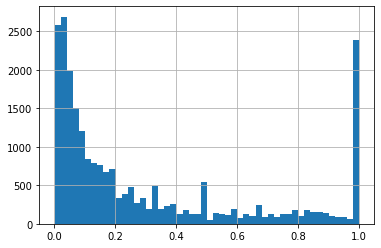

In [40]:
user_game_data['play_game_ratio'].hist(bins=50)

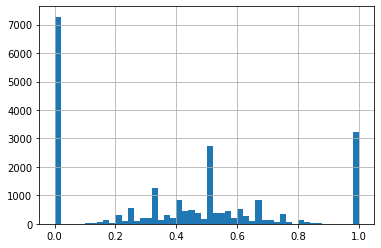

In [41]:
user_game_data['success_ratio'].hist(bins=50)

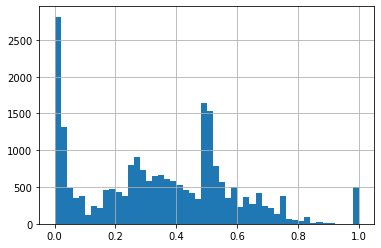

In [42]:
user_game_data['rating'].hist(bins=50)

In [43]:
user_game_data

,Uid,Game,success_ratio,play_game_ratio,rating
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,A100.0,0.566667,0.909091,0.737879
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,A1000.0,0.666667,0.090909,0.378788
2,0016F36E9D87DC1C1D8FCA7F84648122,A100.0,0.464286,0.861538,0.662912
3,0016F36E9D87DC1C1D8FCA7F84648122,A1000.0,0.400000,0.076923,0.238462
4,0016F36E9D87DC1C1D8FCA7F84648122,B1000.0,1.000000,0.015385,0.507692
...,...,...,...,...,...
23363,FFEBE7F5E5879010F54A3B4E71EA2A2D,A100.0,0.777778,0.600000,0.688889
23364,FFEBE7F5E5879010F54A3B4E71EA2A2D,D500.0,0.500000,0.400000,0.450000
23365,FFF5374F5BA9E8D96FEFC94A2E7476E5,A100.0,0.492754,0.802326,0.647540
23366,FFF5374F5BA9E8D96FEFC94A2E7476E5,C1000.0,0.300000,0.116279,0.208140


In [44]:
# Helper functions to assist with recommendation engine

!pip install lightfm
import pandas as pd
import numpy as np
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from sklearn.metrics.pairwise import cosine_similarity


def create_interaction_matrix(df,user_col, item_col, rating_col):
    # Creates an interaction matrix DataFrame
    # Arguments:
    #     df = Pandas DataFrame containing user-item interactions
    #     user_col = column name containing user's identifier
    #     item_col = column name containing item's identifier
    # Returns:
    #     Pandas DataFrame with user-item interactions
    interactions = df.groupby([user_col, item_col])[rating_col] \
            .sum().unstack().reset_index(). \
            fillna(0).set_index(user_col)
    return interactions

def create_user_dict(interactions):
    # Creates a user dictionary based on their index and number in interaction dataset
    # Arguments:
    #     interactions - DataFrame with user-item interactions
    # Returns:
    #     user_dict - Dictionary containing interaction_index as key and user_id as value
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

def create_item_dict(df,id_col,name_col):
    # Creates an item dictionary based on their item_id and item name
    # Returns:
    #     item_dict = Dictionary containing item_id as key and item_name as value
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# Use create_interaction_matrix function
interactions = create_interaction_matrix(df = user_game_data,
                                         user_col = 'Uid',
                                         item_col = 'Game',
                                         rating_col = 'rating')

In [46]:
interactions

Game,A100.0,A1000.0,A10000.0,A100000.0,A1000000.0,A2500.0,A25000.0,A3500.0,A5000.0,A50000.0,A500000.0,B1000.0,C1000.0,C10000.0,C2500.0,C3500.0,C5000.0,D1500.0,D500.0
Uid,,,,,,,,,,,,,,,,,,,
0012CB6DA8CB360BA4ACC6A40F2C5E7D,0.737879,0.378788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
0016F36E9D87DC1C1D8FCA7F84648122,0.662912,0.238462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507692,0.007692,0.0,0.0,0.0,0.0,0.0,0.265385
0025E1205C4BC9306E1E7ECB3442CBFA,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
003A3D8FFC1A33E645D1964823D74535,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.532468
00414AD416F2B38C6A6A742AFF95B5B0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFB69F00BDED61960C20A97C5FDF731B,0.833333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
FFD579A7472E0DF72D195709CA284FBF,0.750000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
FFEBE6E9B98241379E5D97D225A6D116,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [47]:
# Establish number of users in train/test sets
print("TOTAL USERS with Labelled Data: :", len(interactions))
train_num = int(round((0.8)*len(interactions),0))
test_num = int(len(interactions)-train_num)
print("Train Set users: ",train_num)
print("Test Set users: ",test_num)


TOTAL USERS with Labelled Data: : 7009
Train Set users:  5607
Test Set users:  1402


In [48]:
# Define train and test sets
train = interactions[:train_num]
test = interactions[test_num:]

In [49]:
# Create user dictionary using helper function
user_dict = create_user_dict(interactions=interactions)

# # Create game dictionary using helper function
games_dict = create_item_dict(df = game_item_df, id_col = 'Game', name_col = 'Game')



MODELLING AND TRAINING THE DATA

In [50]:
# I am using these functions to train data in the subsequent portion

def run_model(interactions, n_components=30, loss='warp', epoch=30, n_jobs = 4):
    # Runs matrix-factorization model using LightFM
    # Arguments:
    #     interactions = Pandas DataFrame containing user-item interactions
    #     n_components = number of desired embeddings to create to define item and user
    #     loss = loss function other options are logistic, brp
    #     epoch = number of epochs to run 
    #     n_jobs = number of cores used for execution 
    # Returns:
    #     Model = Trained model
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

def split_game_entry(gameentry):
  game = gameentry[0]
  entry = gameentry[1:]
  return game,entry

def get_recs(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,num_items = 10, show_known = False, show_recs = True):
    # Produces user recommendations
    # Arguments:
    #     model = Trained matrix factorization model
    #     interactions = dataset used for training the model
    #     user_id = user ID for which we need to generate recommendation
    #     user_dict = Dictionary containing interaction_index as key and user_id as value
    #     item_dict = Dictionary containing item_id as key and item_name as value
    #     threshold = value above which the rating is favorable in new interaction matrix
    #     num_items = Number of recommendations to provide
    # Returns:
    #     list of titles user_id is predicted to be interested in 
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    # Generate predictions
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    # Getting top predictions
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    # Ensure predictions are not already known
    scores = [x for x in scores if x not in known_items]
    # Take required number of items from prediction list
    return_score_list = scores[0:num_items]
    # Convert from item id to item name using item_dict
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show_recs == True:
        print("Recommended Items:")
        counter = 1
        for i in scores:
          g,e = split_game_entry(i)
          print(str(counter) + '- ' + g + '\nEntry Fees: ' + e)
          counter+=1 

    if show_known == True:
        print("Previously Played top Games:")
        counter = 1
        for i in known_items:
            g,e = split_game_entry(i)
            print(str(counter) + '- ' + g + '\nEntry Fees: ' + e)
            counter+=1

    return scores

# def create_item_emdedding_matrix(model,interactions):
#     df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
#     similarities = cosine_similarity(df_item_norm_sparse)
#     item_emdedding_matrix = pd.DataFrame(similarities)
#     item_emdedding_matrix.columns = interactions.columns
#     item_emdedding_matrix.index = interactions.columns
#     return item_emdedding_matrix

In [51]:
# Create sparse matrices for evaluation 
train_sparse = sparse.csr_matrix(train.values)

#Add X users to Test so that the number of rows in Train match Test
N = train.shape[0] #Rows in Train set
n,m = test.shape #Rows & columns in Test set
z = np.zeros([(N-n),m]) #Create the necessary rows of zeros with m columns
#test = test.toarray() #Temporarily convert Test into a numpy array
test = np.vstack((test,z)) #Vertically stack Test on top of the blank users
test_sparse = sparse.csr_matrix(test) #Convert back to sparse

In [52]:
# Instantiate and fit model
mf_model_warp = run_model(interactions = train,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

##EVALUATION
Here we have used roc-Area under curve as our key metric for evaluation of accuracy since in a recomendation engine, with noisy feedback by diverse users we don't get good overview of the model from Precision, recall etc.

In [53]:
# Get precision
train_precision = precision_at_k(mf_model_warp, train_sparse, k=10).mean()
test_precision = precision_at_k(mf_model_warp, test_sparse, k=10).mean()
print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))

Precision: train 0.33, test 0.28.


We note that the precision score for the test is low, but this is expected due to the sheer volume of games available and the scarcity of interactions.

In [54]:
# Get AUC
train_auc = auc_score(mf_model_warp, train_sparse).mean()
test_auc = auc_score(mf_model_warp, test_sparse).mean()
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

AUC: train 1.00, test 0.83.


In [55]:
# Get recommendations
rec_list = get_recs(model = mf_model_warp, 
                    interactions = interactions, 
                    user_id = '90976392B3AA5DB94D134936B765879E', 
                    user_dict = user_dict,
                    item_dict = games_dict, 
                    threshold = 0,
                    num_items = 7,
                    show_known = True, 
                    show_recs = True)

Recommended Items:
1- A
Entry Fees: 5000.0
2- D
Entry Fees: 1500.0
3- C
Entry Fees: 3500.0
4- A
Entry Fees: 10000.0
5- C
Entry Fees: 10000.0
6- C
Entry Fees: 5000.0
7- A
Entry Fees: 25000.0
Previously Played top Games:
1- D
Entry Fees: 500.0
2- C
Entry Fees: 1000.0
3- B
Entry Fees: 1000.0
4- A
Entry Fees: 2500.0
5- A
Entry Fees: 1000.0
6- A
Entry Fees: 100.0


THE BELOW CELL IS RETURNING THE RECOMENDATIONS FOR USER: X
WE CAN USE THIS IS EXPOSE A SEPARATE API WHICH CAN SIMPLY RETURN THE TOP K (DEFAULT is 7) RECOMENDed GAMES FOR THE GIVEN PLAYER.
IF REQUIRED TO SEE WHICH GAMES ARE KNOWN AND PREVIOUSLY PLAYED BY THE USER, we can use show_known key to print out previously played games as well.

###Embeddings

In [56]:
# Getting embeddings
embeddings = mf_model_warp.item_embeddings
embeddings

array([[ 4.69297618e-01,  5.35677195e-01,  1.19323409e+00,
         4.38851178e-01, -3.55679601e-01, -2.77428269e-01,
         1.41221130e+00, -1.41347086e+00,  2.88366407e-01,
        -1.18827474e+00, -4.10433114e-01,  9.55256224e-01,
        -9.03116167e-01, -8.84276271e-01, -3.10916036e-01,
        -7.41875693e-02, -1.60501599e+00, -1.59161282e+00,
        -2.11787033e+00,  4.91735339e-01,  7.69213796e-01,
         1.28780437e+00, -6.19339496e-02,  2.25709695e-02,
        -1.35677016e+00, -9.27729130e-01,  1.12368095e+00,
        -6.29253909e-02,  1.42079282e+00, -1.71329513e-01],
       [ 7.38265812e-01, -1.61542833e+00, -1.22484758e-01,
         1.10933018e+00, -1.13186991e+00,  1.21967280e+00,
         1.91341527e-02,  8.25076580e-01,  1.60468116e-01,
         2.90289968e-01, -9.36916947e-01,  7.48413682e-01,
        -6.20792031e-01, -4.04110700e-01,  2.35267937e-01,
         5.81046045e-01, -9.48437572e-01,  2.39346445e-01,
         2.10324955e+00,  1.04053721e-01,  5.40293753e-

In [57]:
# View shape
embeddings.shape

(19, 30)

In [58]:
embeddings[0]

array([ 0.46929762,  0.5356772 ,  1.1932341 ,  0.43885118, -0.3556796 ,
       -0.27742827,  1.4122113 , -1.4134709 ,  0.2883664 , -1.1882747 ,
       -0.4104331 ,  0.9552562 , -0.90311617, -0.8842763 , -0.31091604,
       -0.07418757, -1.605016  , -1.5916128 , -2.1178703 ,  0.49173534,
        0.7692138 ,  1.2878044 , -0.06193395,  0.02257097, -1.3567702 ,
       -0.9277291 ,  1.123681  , -0.06292539,  1.4207928 , -0.17132951],
      dtype=float32)

# AREAS OF IMPROVEMENT

Along with the above embeddings, we can use our own embeddings from the preprocessed_data I generated:
1. USER LEVEL DATA: cleaned_data_user
2. GAME LEVEL DATA: game_item_df

This we help us generate an n-dimensional vector against all users and we can use cosine-similarity to check if 2 users are similar or not based on their spatial distance and cosine-similarity.

###**Hence, for any new user or missing user from the given subset (training_data), we can have it's own embeddings and can recomend it games and entry fees same as it's closest user counterparts.**###


Similarly, we can generate GAME_EMBEDDINGS & improve ranking based recomendations by prioritising the recomendations who have smaller spatial distance from similar games. (like the last game played by the user, etc)

I would also like to suggest that we can improve the over-all algorithm by splitting the model into 2 different models where:
1. Model-1 is used for RECOMENDATION OF TOURNAMENT TYPE
2. Model-2 is used for RECOMENDATION OF ENTRY FEES 
